### DATA SCIENCE (Perbandingan Random Forest, Regression Logistic, dan Adaboost dalam Pemodelan Faktor Pengaruh Indeks Pembangunan Manusia)

### IMPORT LIBRARY

In [ ]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

### EKSPLOARASI DATA

In [ ]:
data = pd.read_excel('IPM.xlsx')
data.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal


In [ ]:
# --- Print Dataset Info ---
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', data.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', data.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
data.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 2196
Total Columns: 5
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)

In [ ]:
# --- Seperating Dependent Features ---
x = data.drop(['IPM'], axis=1)
y = data['IPM']

In [ ]:
# --- Data Normalization using Min-Max Method ---
x = MinMaxScaler().fit_transform(x)

In [ ]:
#Inisialisasi variabel X
X = data[['Harapan_Lama_Sekolah','Pengeluaran_Perkapita','Rerata_Lama_Sekolah','Usia_Harapan_Hidup']]
X.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
0,14.36,9572,9.37,69.96
1,13.90,7148,9.48,65.28
2,14.32,8776,8.68,67.43
3,14.60,8180,8.88,64.40
4,14.01,8030,9.67,68.22


In [ ]:
#Inisialisasi variabel y
y = data['IPM']
y.head()

0      High
1    Normal
2    Normal
3    Normal
4    Normal
Name: IPM, dtype: object

In [ ]:
# --- Seperating Dependent Features ---
x = data.drop(['IPM'], axis=1)
y = data['IPM']

In [ ]:
#Mengodekan variabel y atau kelas
le=LabelEncoder()

y=le.fit_transform(y)

In [ ]:
#Splitting dataset menjadi data training sebesar 70% dan data testing sebesar 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### COLOR PALETTE DAN WARNA VISUALISASI

In [ ]:
# --- Notebook Theme (codes from @vivek468 & @sonalisingh1411) ---
from IPython.core.display import display, HTML, Javascript

color_map = ['#8A0030', '#BA1141']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = '''
div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s;
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s;
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s;
    border-top: 2px solid %s;
}

div.input_prompt {
color: %s;
}

div.output_prompt {
color: %s;
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s;
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s;
}

.edit_mode div.cell.selected:before {
background: %s;
}

.edit_mode div.cell.selected {
border-color: %s;

}
'''

def to_rgb(h):
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb():
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

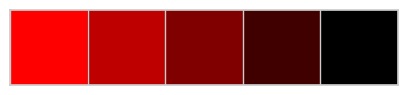

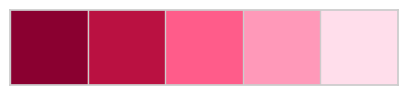

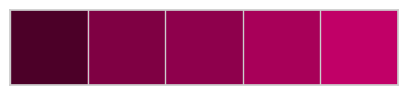

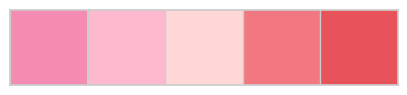

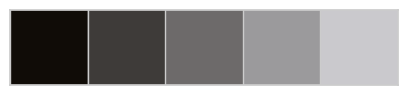

In [ ]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

### MENERAPKAN ADABOOST

In [ ]:
# --- Menerapkan AdaBoost ---
AdaBoostClassifier = AdaBoostClassifier(n_estimators=3)

AdaBoostClassifier.fit(X_train, y_train)
y_pred_AB = AdaBoostClassifier.predict(X_test)

In [ ]:
#Modelling Adaboost dari data training
model1 = AdaBoostClassifier.fit(X_train, y_train)

In [ ]:
#Inisialisasi hasil prediksi model Adaboost dari data testing dengan nama y_pred
y_pred = model1.predict(X_test)

In [ ]:
#Menampilkan hasil prediksi dari data testing
y_pred

array([2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 3, 2, 2,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 0, 0, 2, 0, 0, 3, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 3, 2, 2, 3, 0, 0, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 0, 3, 2, 2, 0, 2, 2, 0, 3, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 3, 2, 2, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 3, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2,

In [ ]:
#Nilai akurasi yang diperoleh dari model Adaboost
print('Adaboost Model Accuracy:', accuracy_score(y_test,y_pred))

Adaboost Model Accuracy: 0.7465857359635811


.:. AdaBoost Accuracy: 74.66% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       240
           1       0.00      0.00      0.00        34
           2       0.81      0.78      0.79       345
           3       0.93      0.33      0.48        40

    accuracy                           0.75       659
   macro avg       0.60      0.49      0.51       659
weighted avg       0.72      0.75      0.72       659


.: Performance Evaluation
**************************


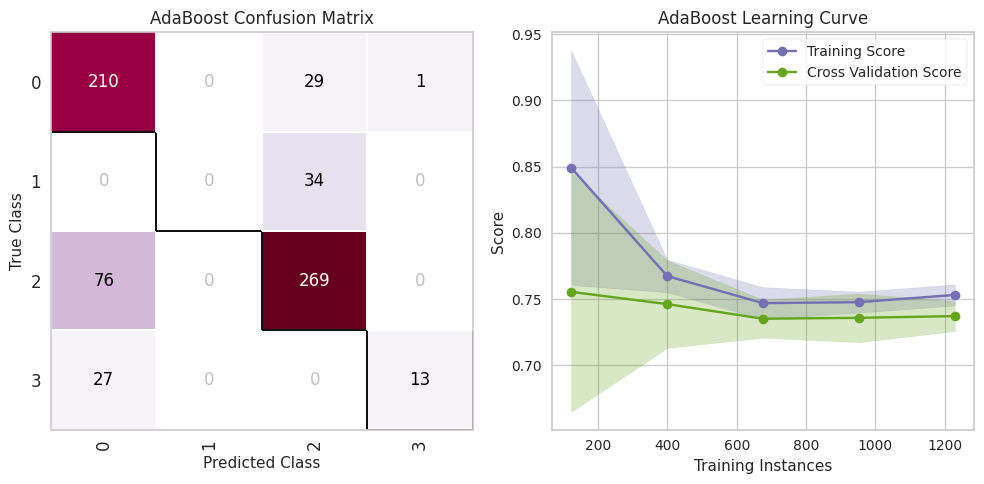

In [ ]:
# --- AdaBoost Accuracy ---
ABAcc = accuracy_score(y_pred, y_test)
print('.:. AdaBoost Accuracy:'+'\033[1m {:.2f}%'.format(ABAcc*100)+' .:.')

# --- AdaBoost Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- AdaBoost Confusion Matrix ---
abcmatrix = ConfusionMatrix(AdaBoostClassifier, ax=ax1, cmap='PuRd',
                            title='AdaBoost Confusion Matrix')
abcmatrix.fit(X_train, y_train)
abcmatrix.score(X_test, y_test)
abcmatrix.finalize()

# --- AdaBoost Learning Curve ---
ablc = LearningCurve(AdaBoostClassifier, ax=ax2, title='AdaBoost Learning Curve')
ablc.fit(X_train, y_train)
ablc.finalize()


plt.tight_layout();

Precision (presisi) adalah rasio true positive (prediksi benar) dengan total prediksi positif, yang mengukur seberapa banyak prediksi positif yang benar. Hasil precision pada kelas 0 adalah 0.67, pada kelas 1 adalah 0.00, pada kelas 2 adalah 0.81, dan pada kelas 3 adalah 0.93.

Recall (ingatan) adalah rasio true positive dengan total jumlah data aktual pada suatu kelas, yang mengukur seberapa banyak data aktual yang berhasil diidentifikasi sebagai positif. Hasil recall pada kelas 0 adalah 0.88, pada kelas 1 adalah 0.00, pada kelas 2 adalah 0.78, dan pada kelas 3 adalah 0.33.

F1-score adalah harmonic mean antara precision dan recall, yang memberikan nilai rata-rata harmonik antara keduanya. F1-score mencerminkan keseimbangan antara precision dan recall. Hasil F1-score pada kelas 0 adalah 0.76, pada kelas 1 adalah 0.00, pada kelas 2 adalah 0.79, dan pada kelas 3 adalah 0.48.

Selain itu, juga disajikan jumlah data (support) pada masing-masing kelas, yaitu 240 data pada kelas 0, 34 data pada kelas 1, 345 data pada kelas 2, dan 40 data pada kelas 3.

### MENERAPKAN RANDOM FOREST

In [ ]:
# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(X_train, y_train)
y_pred_RF = RFclassifier.predict(X_test)

.:. Random Forest Accuracy: 94.99% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       240
           1       1.00      0.91      0.95        34
           2       0.95      0.98      0.96       345
           3       0.97      0.85      0.91        40

    accuracy                           0.95       659
   macro avg       0.97      0.92      0.94       659
weighted avg       0.95      0.95      0.95       659


.: Performance Evaluation
**************************


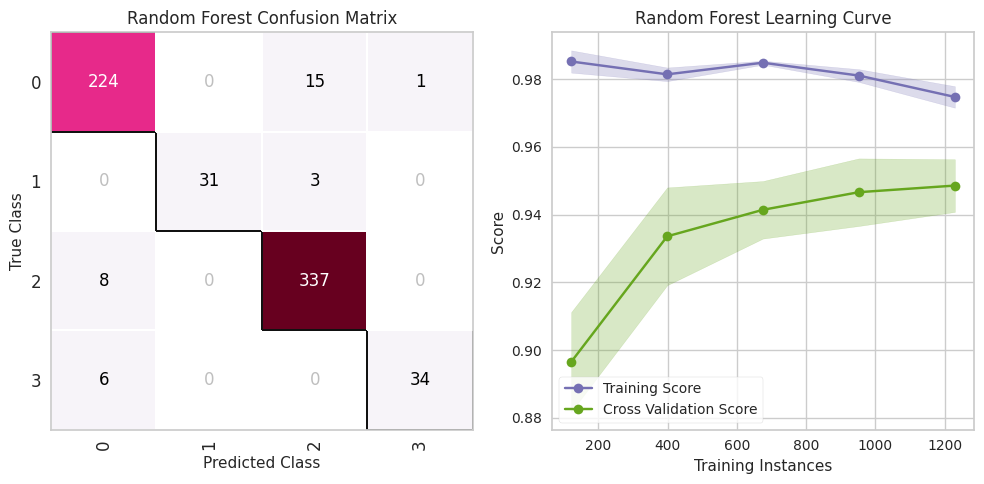

In [ ]:
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(X_train, y_train)
rfcmatrix.score(X_test, y_test)
rfcmatrix.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(RFclassifier, ax=ax2, title='Random Forest Learning Curve')
rcclc.fit(X_train, y_train)
rcclc.finalize()

plt.tight_layout();

### MENERAPKAN LOGISTIC REGRESSION

In [ ]:
# --- Applying Logistic Regression ---
LRclassifier = LogisticRegression(max_iter=1000, random_state=1)#, solver='liblinear', penalty='l1')
LRclassifier.fit(X_train, y_train)

y_pred_LR = LRclassifier.predict(X_test)

.:. Logistic Regression Accuracy: 79.06% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       240
           1       1.00      0.62      0.76        34
           2       0.80      0.86      0.83       345
           3       0.81      0.75      0.78        40

    accuracy                           0.79       659
   macro avg       0.84      0.74      0.78       659
weighted avg       0.79      0.79      0.79       659


.: Performance Evaluation
**************************


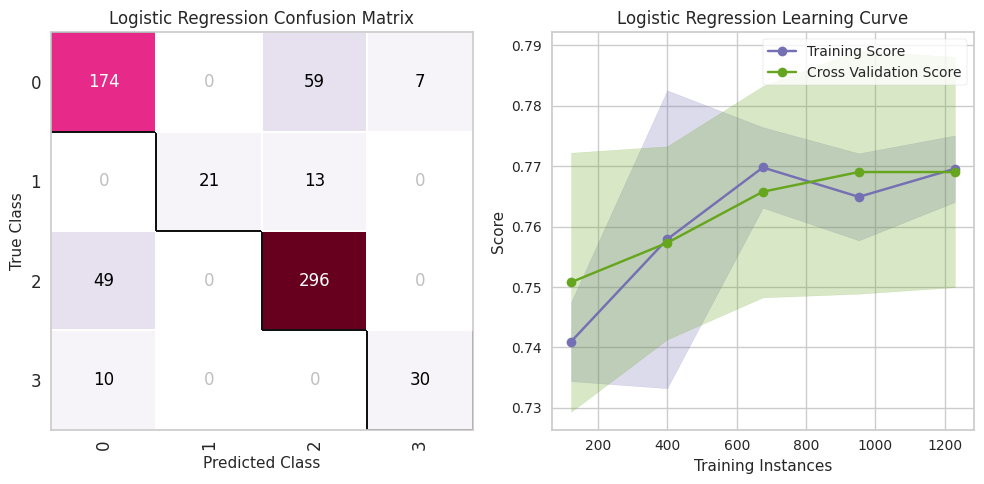

In [ ]:
# --- LR Accuracy ---
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_LR))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- LR Confusion Matrix ---
logmatrix = ConfusionMatrix(LRclassifier, ax=ax1, cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(X_train, y_train)
logmatrix.score(X_test, y_test)
logmatrix.finalize()

# --- LR Learning Curve ---
loglc = LearningCurve(LRclassifier, ax=ax2, title='Logistic Regression Learning Curve')
loglc.fit(X_train, y_train)
loglc.finalize()

plt.tight_layout();

### KOMPARASI HASIL ALGORITMA

In [ ]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest','AdaBoost'],
                        'Accuracy': [LRAcc*100, RFAcc*100, ABAcc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Model,Accuracy
Random Forest,94.992413
Logistic Regression,79.059181
AdaBoost,74.658574


### KESIMPULAN

Berdasar penerapan perbandingan algoritma Random Forest, Logistic Regression, dan Adaboost untuk Dataset Indeks Pembangunan yang dilakukan dengan label 'IPM' demi memperoleh informasi terkait pemodelan manakah yang terbaik sehingga menghasilkan akurasi terbaik 94% oleh algoritma Random Forest.